In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [3]:
print('y label count', np.bincount(y))
print('train y label count', np.bincount(y_train))
print('test y label count', np.bincount(y_test))

y label count [50 50 50]
train y label count [36 32 37]
test y label count [14 18 13]


In [0]:
# stratify=y option
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('y label count', np.bincount(y))
print('train y label count', np.bincount(y_train))
print('test y label count', np.bincount(y_test))

y label count [50 50 50]
train y label count [35 35 35]
test y label count [15 15 15]


In [0]:
# features normalize

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e03, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=1000.0,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
y_pred = ppn.predict(X_test_std)
print('wrong case count: ', (y_test != y_pred).sum())

wrong case count:  2


In [9]:
from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(y_test, y_pred))

accuracy:  0.9555555555555556


In [10]:
print('accuracy: ', ppn.score(X_test_std, y_test))

accuracy:  0.9555555555555556


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # set marker * colors
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정경계를 그린다.
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.3, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


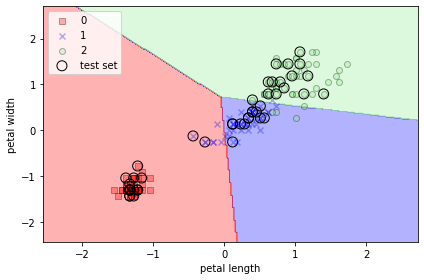

In [12]:
# vstack 함수 옆으로 붙임 
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()